In [ ]:
pip install comet

In [450]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="cbtJsKjDivb61gTUBXpeo48r7",
    project_name="classification-predict-streamlit-group3",
    workspace="Lucky-py")

ModuleNotFoundError: No module named 'comet_ml'

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we are going to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [384]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import nltk

In [410]:
# load the data
df = pd.read_csv('train.csv')
df1 =pd.read_csv('test.csv')
df2 = df[:10546]

In [411]:
df2.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [412]:
df2.shape

(10546, 3)

In [413]:
df1.shape

(10546, 2)

In [414]:
df1.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [415]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [417]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [418]:
df1.isnull().sum()

message    0
tweetid    0
dtype: int64

In [419]:
df['message']

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object

In [420]:
type_labels = list(df.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


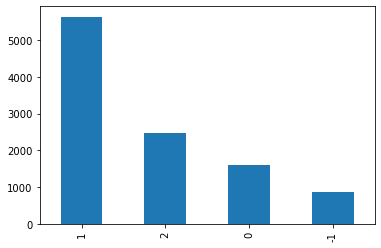

In [251]:
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

## Text Cleaning

### Removing Noise

In [421]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df2['message'] = df2['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df1['message'] = df1['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

<ipython-input-421-4959e1938203>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['message'] = df2['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [422]:
df2.shape

(10546, 3)

In [423]:
df2['message'] = df2['message'].str.lower()
df1['message'] = df1['message'].str.lower()



<ipython-input-423-7a014ba4bc62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['message'] = df2['message'].str.lower()


In [424]:
df2['message']

0        polyscimajor epa chief doesn't think carbon di...
1        it's not like we lack evidence of anthropogeni...
2        rt @rawstory: researchers say we have three ye...
3        #todayinmaker# wired : 2016 was a pivotal year...
4        rt @soynoviodetodas: it's 2016, and a racist, ...
                               ...                        
10541    ecowas says addressing climate change issues w...
10542    @sarahartman my god, he's going to build a wal...
10543    rt @sensanders: if we don't address climate ch...
10544    i'm wearing a jean jacket during winter ...glo...
10545    rt @awuillermin: you know what im so stoked on...
Name: message, Length: 10546, dtype: object

In [425]:
import string

In [426]:
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

In [427]:
df2['message'] = df2['message'].apply(remove_punctuation)
df1['message'] = df1['message'].apply(remove_punctuation)



<ipython-input-427-d97c9ea70607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['message'] = df2['message'].apply(remove_punctuation)


In [259]:
# from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [260]:
# tokeniser = TreebankWordTokenizer()
# df['message'] = df['message'].apply(tokeniser.tokenize)

In [409]:
df2['message']

0        polyscimajor epa chief doesnt think carbon dio...
1        its not like we lack evidence of anthropogenic...
2        rt rawstory researchers say we have three year...
3        todayinmaker wired  2016 was a pivotal year in...
4        rt soynoviodetodas its 2016 and a racist sexis...
                               ...                        
10541    ecowas says addressing climate change issues w...
10542    sarahartman my god hes going to build a wall p...
10543    rt sensanders if we dont address climate chang...
10544    im wearing a jean jacket during winter global ...
10545    rt awuillermin you know what im so stoked on t...
Name: message, Length: 10546, dtype: object

In [262]:
# from nltk import SnowballStemmer

In [263]:
# def tweets_stemmer(words, stemmer):
#     return [stemmer.stem(word) for word in words]

In [264]:
# stemmer = SnowballStemmer('english')
# df['message'] = df['message'].apply(tweets_stemmer, args=(stemmer, ))

In [265]:
# for i, t in enumerate(df.iloc[15814]['message']):    
#     print ('{:20s} --> {:10s}'.format(t, df.iloc[15814]['message'][i]))

In [266]:
# from nltk.corpus import stopwords
# def remove_stop_words(message):    
#     return [t for t in message if t not in stopwords.words('english')]

In [267]:
# df['message'] = df['message'].apply(remove_stop_words)

In [268]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


In [428]:
from sklearn.feature_extraction.text import CountVectorizer

In [287]:
vect = CountVectorizer()


CountVectorizer()

In [429]:
new = vect.transform(df2['message'])
new1 = new.toarray()

In [430]:
new2 = vect.transform(df1['message'])
new3 = new2.toarray()

In [431]:
df1

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,karoli morgfair osborneink dailykos \nputin go...,476263
4,rt fakewillmoore female orgasms cause global w...,872928
...,...,...
10541,rt brittanybohrer brb writing a poem about cli...,895714
10542,2016 the year climate change came home during ...,875167
10543,rt loopvanuatu pacific countries positive abou...,78329
10544,rt xanria00018 you’re so hot you must be the c...,867455


In [432]:
X = new1
y = df2['sentiment']

In [433]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [434]:
from sklearn.naive_bayes import MultinomialNB

In [435]:
naive_model = MultinomialNB().fit(X_train , y_train)
ypred = naive_model.predict(new3)

In [437]:
output4 = pd.DataFrame({'sentiment': ypred}) 

#output4.to_csv('submission.csv', index=False)

In [438]:
output4 = df1[['tweetid']]

In [439]:
output4['sentiment'] = ypred

In [440]:
output4.to_csv('submission1.csv', index=False)

In [441]:
output4

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,1


In [442]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(new3)


In [443]:
output5 = df1[['tweetid']]

In [444]:
output5['sentiment'] = y_pred

In [447]:
output5.to_csv('submission2.csv', index=False)

In [446]:
df2.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954
